<a href="https://colab.research.google.com/github/kylemath/ml4a-guides/blob/master/notebooks/image-search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Search and Similarity Calculation between MetMuseum Collection Images and Contemporary Artists Image Collection


This notebook takes the features of the MetMuseum Collection extracted from the `MetCollection_FeatureSearch_Extract` notebook, it can perform image search, but then compares a dataset of images by 50 contemporary artists scraped from their Instagram Accounts, and compares the embedding values for both collections in order to obtain a list based on two parameters:

- Similarity to all images in the MetMusuem Collection
- Smmilarity to the 10 closest images
- Similarity to closest image

The decision to include these 3 parameters is that there are some works that are really simmilar to their closest one in the collection, and the values in this category vary widely (approx 0.4 points). The distance to general collection is a different issue, since it takes so many works into account, the variation between the top and the bottom value is very small (0.03 points or 10 times less than the first category). That is why I included a third category with K = 10 (or the distance to the 10 closest artworks) to give another parameter to judge that is not as narrow as the general collection (the variation for this value is 0.06)

In [1]:
import os
import keras
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions, preprocess_input
from keras.models import Model

Using TensorFlow backend.


In [2]:
%matplotlib inline
import os
import random
import numpy as np
import json
import matplotlib.pyplot
import pickle
from matplotlib.pyplot import imshow
from PIL import Image
from sklearn.manifold import TSNE

Imports the Met model. I had to re-train it in local machine so the directories match

In [40]:
images, pca_features, pca = pickle.load(open(r"D:\ML\MetImages\MetFeatures_localMachine.p", 'rb'))

for img, f in list(zip(images, pca_features))[0:5]:
    print("image: %s, features: %0.2f,%0.2f,%0.2f,%0.2f... "%(img, f[0], f[1], f[2], f[3]))

image: D:\ML\MetImages\Cropped288\f00000_A Basket of Clams12388.jpg, features: -5.74,-22.82,-15.00,-0.92... 
image: D:\ML\MetImages\Cropped288\f00001_A Bear Walking459184.jpg, features: 9.90,-0.42,-13.19,-14.04... 
image: D:\ML\MetImages\Cropped288\f00002_A Descriptive Atlas of the Cesnola Collection of Cypriote Antiquities in the Metropolitan Museum of Art, New York  1885 1903 591850.jpg, features: -9.74,-8.44,6.70,3.12... 
image: D:\ML\MetImages\Cropped288\f00003_A Gathering at Wood s Edge337105.jpg, features: 8.89,0.17,-13.93,-5.68... 
image: D:\ML\MetImages\Cropped288\f00004_A Giant Seated in a Landscape, sometimes called  The Colossus 334002.jpg, features: 3.50,-18.80,-3.01,-5.32... 


C:\Users\juani\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:334: UserWarning: Trying to unpickle estimator PCA from version 0.21.3 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


Importing a random image from within the model 

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def load_image(path):
    img = image.load_img(path, target_size=model.input_shape[1:3])
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x

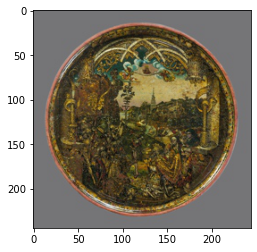

In [5]:
import random

# grab a random query image
query_image_idx = int(len(images) * random.random())

# let's display the image
img = image.load_img(images[query_image_idx])
plt.imshow(img)

### Querying one image and returning closest five elements

In [6]:
from scipy.spatial import distance

similar_idx = [ distance.cosine(pca_features[query_image_idx], feat) for feat in pca_features ]

In [7]:
def get_closest_images(query_image_idx, num_results=5):
    distances = [ distance.cosine(pca_features[query_image_idx], feat) for feat in pca_features ]
    idx_closest = sorted(range(len(distances)), key=lambda k: distances[k])[1:num_results+1]
    return idx_closest

def get_concatenated_images(indexes, thumb_height):
    thumbs = []
    for idx in indexes:
        img = image.load_img(images[idx])
        img = img.resize((int(img.width * thumb_height / img.height), thumb_height))
        thumbs.append(img)
    concat_image = np.concatenate([np.asarray(t) for t in thumbs], axis=1)
    return concat_image


Text(0.5, 1.0, 'result images')

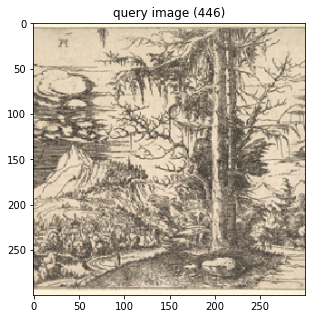

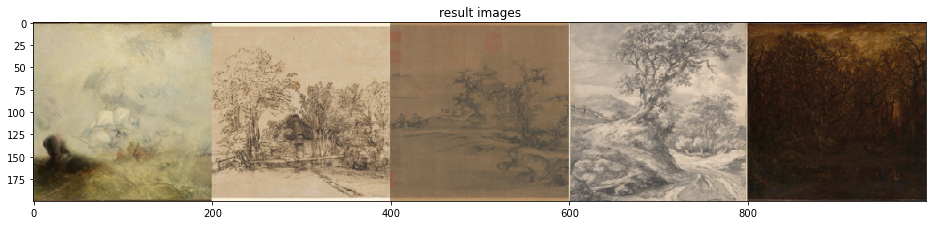

In [8]:
# do a query on a random image
query_image_idx = int(len(images) * random.random())
idx_closest = get_closest_images(query_image_idx)
query_image = get_concatenated_images([query_image_idx], 300)
results_image = get_concatenated_images(idx_closest, 200)

# display the query image
plt.figure(figsize = (5,5))
plt.imshow(query_image)
plt.title("query image (%d)" % query_image_idx)

# display the resulting images
plt.figure(figsize = (16,12))
plt.imshow(results_image)
plt.title("result images")

### Importing images from the artist directory and pairing them with the MetCollection

In [9]:
# import shutil
# import glob

# # Getting all files within the subdirectories within CroppedIm
# basepath = r"D:\ML\ColombiArtistas"
# fanems = sorted(glob.glob(basepath + "/**/*.jpg", recursive=True))

In [13]:
# dstDir = r"D:\ML\ColombiArtistas\Ztodos"
# ii = 1

# for file in fanems:
#     old_name = file
#     filename = file [24:-4]
#     new_name = os.path.join(dstDir +"/" + filename + str(ii) + '.jpg')
#     shutil.copy(file, new_name)
#     ii += 1
#     print('copied', new_name[-13:])


In [11]:
for file in fanems:
    old_name = file
    filename = file [24:-4]
    new_name = os.path.join(dstDir + '/' + filename + str(ii) + '.jpg')
    print(new_name)

D:\ML\ColombiArtistas\Ztodos/rapedArtists\adalbertocalvogonzalez_artista\adalbertocalvogonzalez_0011.jpg
D:\ML\ColombiArtistas\Ztodos/rapedArtists\adalbertocalvogonzalez_artista\adalbertocalvogonzalez_0021.jpg
D:\ML\ColombiArtistas\Ztodos/rapedArtists\adalbertocalvogonzalez_artista\adalbertocalvogonzalez_0031.jpg
D:\ML\ColombiArtistas\Ztodos/rapedArtists\adalbertocalvogonzalez_artista\adalbertocalvogonzalez_0041.jpg
D:\ML\ColombiArtistas\Ztodos/rapedArtists\adalbertocalvogonzalez_artista\adalbertocalvogonzalez_0051.jpg
D:\ML\ColombiArtistas\Ztodos/rapedArtists\adalbertocalvogonzalez_artista\adalbertocalvogonzalez_0061.jpg
D:\ML\ColombiArtistas\Ztodos/rapedArtists\adalbertocalvogonzalez_artista\adalbertocalvogonzalez_0071.jpg
D:\ML\ColombiArtistas\Ztodos/rapedArtists\adalbertocalvogonzalez_artista\adalbertocalvogonzalez_0081.jpg
D:\ML\ColombiArtistas\Ztodos/rapedArtists\adalbertocalvogonzalez_artista\adalbertocalvogonzalez_0091.jpg
D:\ML\ColombiArtistas\Ztodos/rapedArtists\adalbertocalv

D:\ML\ColombiArtistas\Ztodos/rapedArtists\andres_moreno_hoffmann\Andres_Moreno_Hoffmann_1141.jpg
D:\ML\ColombiArtistas\Ztodos/rapedArtists\andres_moreno_hoffmann\Andres_Moreno_Hoffmann_1151.jpg
D:\ML\ColombiArtistas\Ztodos/rapedArtists\andres_moreno_hoffmann\Andres_Moreno_Hoffmann_1161.jpg
D:\ML\ColombiArtistas\Ztodos/rapedArtists\andres_moreno_hoffmann\Andres_Moreno_Hoffmann_1171.jpg
D:\ML\ColombiArtistas\Ztodos/rapedArtists\andres_moreno_hoffmann\Andres_Moreno_Hoffmann_1181.jpg
D:\ML\ColombiArtistas\Ztodos/rapedArtists\andres_moreno_hoffmann\Andres_Moreno_Hoffmann_1191.jpg
D:\ML\ColombiArtistas\Ztodos/rapedArtists\andres_moreno_hoffmann\Andres_Moreno_Hoffmann_1201.jpg
D:\ML\ColombiArtistas\Ztodos/rapedArtists\andres_moreno_hoffmann\Andres_Moreno_Hoffmann_1211.jpg
D:\ML\ColombiArtistas\Ztodos/rapedArtists\andres_moreno_hoffmann\Andres_Moreno_Hoffmann_1221.jpg
D:\ML\ColombiArtistas\Ztodos/rapedArtists\andres_moreno_hoffmann\Andres_Moreno_Hoffmann_1231.jpg
D:\ML\ColombiArtistas\Ztodos/r

D:\ML\ColombiArtistas\Ztodos/rapedArtists\catalinaortiz1065\catalinaortiz1065_1001.jpg
D:\ML\ColombiArtistas\Ztodos/rapedArtists\catalinaortiz1065\catalinaortiz1065_1011.jpg
D:\ML\ColombiArtistas\Ztodos/rapedArtists\catalinaortiz1065\catalinaortiz1065_1021.jpg
D:\ML\ColombiArtistas\Ztodos/rapedArtists\catalinaortiz1065\catalinaortiz1065_1031.jpg
D:\ML\ColombiArtistas\Ztodos/rapedArtists\catalinaortiz1065\catalinaortiz1065_1041.jpg
D:\ML\ColombiArtistas\Ztodos/rapedArtists\catalinaortiz1065\catalinaortiz1065_1051.jpg
D:\ML\ColombiArtistas\Ztodos/rapedArtists\catalinaortiz1065\catalinaortiz1065_1061.jpg
D:\ML\ColombiArtistas\Ztodos/rapedArtists\catalinaortiz1065\catalinaortiz1065_1071.jpg
D:\ML\ColombiArtistas\Ztodos/rapedArtists\catalinaortiz1065\catalinaortiz1065_1081.jpg
D:\ML\ColombiArtistas\Ztodos/rapedArtists\catalinaortiz1065\catalinaortiz1065_1091.jpg
D:\ML\ColombiArtistas\Ztodos/rapedArtists\catalinaortiz1065\catalinaortiz1065_1101.jpg
D:\ML\ColombiArtistas\Ztodos/rapedArtists\c

D:\ML\ColombiArtistas\Ztodos/rapedArtists\feliperomero30\feliperomero30_0961.jpg
D:\ML\ColombiArtistas\Ztodos/rapedArtists\feliperomero30\feliperomero30_0971.jpg
D:\ML\ColombiArtistas\Ztodos/rapedArtists\feliperomero30\feliperomero30_0981.jpg
D:\ML\ColombiArtistas\Ztodos/rapedArtists\feliperomero30\feliperomero30_0991.jpg
D:\ML\ColombiArtistas\Ztodos/rapedArtists\feliperomero30\feliperomero30_1001.jpg
D:\ML\ColombiArtistas\Ztodos/rapedArtists\feliperomero30\feliperomero30_1011.jpg
D:\ML\ColombiArtistas\Ztodos/rapedArtists\feliperomero30\feliperomero30_1021.jpg
D:\ML\ColombiArtistas\Ztodos/rapedArtists\feliperomero30\feliperomero30_1031.jpg
D:\ML\ColombiArtistas\Ztodos/rapedArtists\feliperomero30\feliperomero30_1041.jpg
D:\ML\ColombiArtistas\Ztodos/rapedArtists\feliperomero30\feliperomero30_1051.jpg
D:\ML\ColombiArtistas\Ztodos/rapedArtists\feliperomero30\feliperomero30_1061.jpg
D:\ML\ColombiArtistas\Ztodos/rapedArtists\feliperomero30\feliperomero30_1071.jpg
D:\ML\ColombiArtistas\Ztodos

D:\ML\ColombiArtistas\Ztodos/rapedArtists\juan_covelli\juan_covelli_0241.jpg
D:\ML\ColombiArtistas\Ztodos/rapedArtists\juan_covelli\juan_covelli_0251.jpg
D:\ML\ColombiArtistas\Ztodos/rapedArtists\juan_covelli\juan_covelli_0261.jpg
D:\ML\ColombiArtistas\Ztodos/rapedArtists\juan_covelli\juan_covelli_0271.jpg
D:\ML\ColombiArtistas\Ztodos/rapedArtists\juan_covelli\juan_covelli_0281.jpg
D:\ML\ColombiArtistas\Ztodos/rapedArtists\juan_covelli\juan_covelli_0291.jpg
D:\ML\ColombiArtistas\Ztodos/rapedArtists\juan_covelli\juan_covelli_0301.jpg
D:\ML\ColombiArtistas\Ztodos/rapedArtists\juan_covelli\juan_covelli_0311.jpg
D:\ML\ColombiArtistas\Ztodos/rapedArtists\juan_covelli\juan_covelli_0321.jpg
D:\ML\ColombiArtistas\Ztodos/rapedArtists\juan_covelli\juan_covelli_0331.jpg
D:\ML\ColombiArtistas\Ztodos/rapedArtists\juan_covelli\juan_covelli_0341.jpg
D:\ML\ColombiArtistas\Ztodos/rapedArtists\juan_covelli\juan_covelli_0351.jpg
D:\ML\ColombiArtistas\Ztodos/rapedArtists\juan_covelli\juan_covelli_0361.jpg

D:\ML\ColombiArtistas\Ztodos/rapedArtists\juansebastianrosillo\juansebastianrosillo_0391.jpg
D:\ML\ColombiArtistas\Ztodos/rapedArtists\juansebastianrosillo\juansebastianrosillo_0401.jpg
D:\ML\ColombiArtistas\Ztodos/rapedArtists\juansebastianrosillo\juansebastianrosillo_0411.jpg
D:\ML\ColombiArtistas\Ztodos/rapedArtists\juansebastianrosillo\juansebastianrosillo_0421.jpg
D:\ML\ColombiArtistas\Ztodos/rapedArtists\juansebastianrosillo\juansebastianrosillo_0431.jpg
D:\ML\ColombiArtistas\Ztodos/rapedArtists\juansebastianrosillo\juansebastianrosillo_0441.jpg
D:\ML\ColombiArtistas\Ztodos/rapedArtists\juansebastianrosillo\juansebastianrosillo_0451.jpg
D:\ML\ColombiArtistas\Ztodos/rapedArtists\juansebastianrosillo\juansebastianrosillo_0461.jpg
D:\ML\ColombiArtistas\Ztodos/rapedArtists\juansebastianrosillo\juansebastianrosillo_0471.jpg
D:\ML\ColombiArtistas\Ztodos/rapedArtists\juansebastianrosillo\juansebastianrosillo_0481.jpg
D:\ML\ColombiArtistas\Ztodos/rapedArtists\juansebastianrosillo\juanseb

D:\ML\ColombiArtistas\Ztodos/rapedArtists\sebastian_fonnegra\sebastian_fonnegra_0521.jpg
D:\ML\ColombiArtistas\Ztodos/rapedArtists\sebastian_fonnegra\sebastian_fonnegra_0531.jpg
D:\ML\ColombiArtistas\Ztodos/rapedArtists\sebastian_fonnegra\sebastian_fonnegra_0541.jpg
D:\ML\ColombiArtistas\Ztodos/rapedArtists\sebastian_fonnegra\sebastian_fonnegra_0551.jpg
D:\ML\ColombiArtistas\Ztodos/rapedArtists\sebastian_fonnegra\sebastian_fonnegra_0561.jpg
D:\ML\ColombiArtistas\Ztodos/rapedArtists\sebastian_fonnegra\sebastian_fonnegra_0571.jpg
D:\ML\ColombiArtistas\Ztodos/rapedArtists\sebastian_fonnegra\sebastian_fonnegra_0581.jpg
D:\ML\ColombiArtistas\Ztodos/rapedArtists\sebastian_fonnegra\sebastian_fonnegra_0591.jpg
D:\ML\ColombiArtistas\Ztodos/rapedArtists\sebastian_fonnegra\sebastian_fonnegra_0601.jpg
D:\ML\ColombiArtistas\Ztodos/rapedArtists\sebastian_fonnegra\sebastian_fonnegra_0611.jpg
D:\ML\ColombiArtistas\Ztodos/rapedArtists\sebastian_fonnegra\sebastian_fonnegra_0621.jpg
D:\ML\ColombiArtistas

D:\ML\ColombiArtistas\Ztodos/odos\Alequint_1241.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Alequint_1251.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Alequint_1261.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Alequint_1271.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Alequint_1281.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Alequint_1291.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Alequint_1301.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Alequint_1311.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Alequint_1321.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Alequint_1331.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Alequint_1341.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Alequint_1351.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Alequint_1361.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Alequint_1371.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Alequint_1381.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Alequint_1391.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Alequint_1401.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Alequint_1411.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Alequint_1421.jpg
D:\ML\Colomb

D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f00073_Agustinalallana_0741.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f00074_Agustinalallana_0751.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f00075_Agustinalallana_0761.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f00076_Agustinalallana_0771.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f00077_Agustinalallana_0781.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f00078_Agustinalallana_0791.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f00079_Agustinalallana_0801.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f00080_Agustinalallana_0811.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f00081_Agustinalallana_0821.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f00082_Agustinalallana_0831.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f00083_Agustinalallana_0841.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f00084_Agustinalallana_0851.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f00085_Agustinalallana_0861.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Crop

D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f01905_camilacostalzate_0151.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f01906_camilacostalzate_0161.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f01907_camilacostalzate_0171.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f01908_camilacostalzate_0181.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f01909_camilacostalzate_0191.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f01910_camilacostalzate_0201.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f01911_camilacostalzate_0211.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f01912_camilacostalzate_0221.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f01913_camilacostalzate_0231.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f01914_camilacostalzate_0241.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f01915_camilacostalzate_0251.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f01916_camilacostalzate_0261.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f01917_camilacostalzate_0271.jpg
D:\ML\ColombiArtistas\Zto

D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f02811_dacunat_2001.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f02812_dacunat_2011.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f02813_dacunat_2021.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f02814_dacunat_2031.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f02815_dacunat_2041.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f02816_dacunat_2051.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f02817_dacunat_2061.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f02818_dacunat_2071.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f02819_dacunat_2081.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f02820_dacunat_2091.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f02821_dacunat_2101.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f02822_dacunat_2111.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f02823_dacunat_2121.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f02824_dacunat_2131.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f02825_dacunat_2141.jpg
D:\ML\Colo

D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f04496_gabrielhernandezserrato_2521.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f04497_gabrielhernandezserrato_2531.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f04498_gabrielhernandezserrato_2541.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f04499_gabrielhernandezserrato_2551.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f04500_gabrielhernandezserrato_2561.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f04501_gabrielhernandezserrato_2571.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f04502_gabrielhernandezserrato_2581.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f04503_gabrielhernandezserrato_2591.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f04504_gabrielhernandezserrato_2601.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f04505_gabrielhernandezserrato_2611.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f04506_gabrielhernandezserrato_2621.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f04507_gabrielhernandezserrato_2631.jpg
D:\ML\ColombiArt

D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f05899_juansebastianrosillo_1671.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f05900_juansebastianrosillo_1681.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f05901_juansebastianrosillo_1691.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f05902_juansebastianrosillo_1701.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f05903_juansebastianrosillo_1711.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f05904_juansebastianrosillo_1721.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f05905_juansebastianrosillo_1731.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f05906_juansebastianrosillo_1741.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f05907_juansebastianrosillo_1751.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f05908_juansebastianrosillo_1761.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f05909_juansebastianrosillo_1771.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f05910_juansebastianrosillo_1781.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f05911_jua

D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f07126_nclsbarrera_0971.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f07126_nclsbarrera_0991.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f07127_nclsbarrera_1001.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f07128_nclsbarrera_1021.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f07129_nclsbarrera_1031.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f07130_nclsbarrera_1041.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f07131_nclsbarrera_1051.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f07132_nclsbarrera_1061.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f07133_nclsbarrera_1071.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f07134_ojedaenel.lente_0011.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f07135_ojedaenel.lente_0021.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f07136_nclsbarrera_1071.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f07136_ojedaenel.lente_0031.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f07137_ojedaenel.lente_0011.jpg
D:\M

D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f08091_vicentavictoriagomez_0181.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f08092_vicentavictoriagomez_0191.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f08093_vicentavictoriagomez_0161.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f08093_vicentavictoriagomez_0201.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f08094_vicentavictoriagomez_0171.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f08094_vicentavictoriagomez_0211.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f08095_vicentavictoriagomez_0181.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f08095_vicentavictoriagomez_0221.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f08096_vicentavictoriagomez_0231.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f08097_vicentavictoriagomez_0241.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f08098_vicentavictoriagomez_0251.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f08099_vicentavictoriagomez_0261.jpg
D:\ML\ColombiArtistas\Ztodos/odos\Cropped\f08100_vic

D:\ML\ColombiArtistas\Ztodos/odos\dacunat_0721.jpg
D:\ML\ColombiArtistas\Ztodos/odos\dacunat_0731.jpg
D:\ML\ColombiArtistas\Ztodos/odos\dacunat_0741.jpg
D:\ML\ColombiArtistas\Ztodos/odos\dacunat_0751.jpg
D:\ML\ColombiArtistas\Ztodos/odos\dacunat_0761.jpg
D:\ML\ColombiArtistas\Ztodos/odos\dacunat_0771.jpg
D:\ML\ColombiArtistas\Ztodos/odos\dacunat_0781.jpg
D:\ML\ColombiArtistas\Ztodos/odos\dacunat_0791.jpg
D:\ML\ColombiArtistas\Ztodos/odos\dacunat_0801.jpg
D:\ML\ColombiArtistas\Ztodos/odos\dacunat_0811.jpg
D:\ML\ColombiArtistas\Ztodos/odos\dacunat_0821.jpg
D:\ML\ColombiArtistas\Ztodos/odos\dacunat_0831.jpg
D:\ML\ColombiArtistas\Ztodos/odos\dacunat_0841.jpg
D:\ML\ColombiArtistas\Ztodos/odos\dacunat_0851.jpg
D:\ML\ColombiArtistas\Ztodos/odos\dacunat_0861.jpg
D:\ML\ColombiArtistas\Ztodos/odos\dacunat_0871.jpg
D:\ML\ColombiArtistas\Ztodos/odos\dacunat_0881.jpg
D:\ML\ColombiArtistas\Ztodos/odos\dacunat_0891.jpg
D:\ML\ColombiArtistas\Ztodos/odos\dacunat_0901.jpg
D:\ML\ColombiArtistas\Ztodos/od

D:\ML\ColombiArtistas\Ztodos/odos\federicopuyo_0091.jpg
D:\ML\ColombiArtistas\Ztodos/odos\federicopuyo_0101.jpg
D:\ML\ColombiArtistas\Ztodos/odos\federicopuyo_0111.jpg
D:\ML\ColombiArtistas\Ztodos/odos\federicopuyo_0121.jpg
D:\ML\ColombiArtistas\Ztodos/odos\federicopuyo_0131.jpg
D:\ML\ColombiArtistas\Ztodos/odos\federicopuyo_0141.jpg
D:\ML\ColombiArtistas\Ztodos/odos\federicopuyo_0151.jpg
D:\ML\ColombiArtistas\Ztodos/odos\federicopuyo_0161.jpg
D:\ML\ColombiArtistas\Ztodos/odos\federicopuyo_0171.jpg
D:\ML\ColombiArtistas\Ztodos/odos\federicopuyo_0181.jpg
D:\ML\ColombiArtistas\Ztodos/odos\federicopuyo_0191.jpg
D:\ML\ColombiArtistas\Ztodos/odos\federicopuyo_0201.jpg
D:\ML\ColombiArtistas\Ztodos/odos\federicopuyo_0211.jpg
D:\ML\ColombiArtistas\Ztodos/odos\federicopuyo_0221.jpg
D:\ML\ColombiArtistas\Ztodos/odos\federicopuyo_0231.jpg
D:\ML\ColombiArtistas\Ztodos/odos\federicopuyo_0241.jpg
D:\ML\ColombiArtistas\Ztodos/odos\federicopuyo_0251.jpg
D:\ML\ColombiArtistas\Ztodos/odos\federicopuyo_0

D:\ML\ColombiArtistas\Ztodos/odos\juan_covelli_0171.jpg
D:\ML\ColombiArtistas\Ztodos/odos\juan_covelli_0181.jpg
D:\ML\ColombiArtistas\Ztodos/odos\juan_covelli_0191.jpg
D:\ML\ColombiArtistas\Ztodos/odos\juan_covelli_0201.jpg
D:\ML\ColombiArtistas\Ztodos/odos\juan_covelli_0211.jpg
D:\ML\ColombiArtistas\Ztodos/odos\juan_covelli_0221.jpg
D:\ML\ColombiArtistas\Ztodos/odos\juan_covelli_0231.jpg
D:\ML\ColombiArtistas\Ztodos/odos\juan_covelli_0241.jpg
D:\ML\ColombiArtistas\Ztodos/odos\juan_covelli_0251.jpg
D:\ML\ColombiArtistas\Ztodos/odos\juan_covelli_0261.jpg
D:\ML\ColombiArtistas\Ztodos/odos\juan_covelli_0271.jpg
D:\ML\ColombiArtistas\Ztodos/odos\juan_covelli_0281.jpg
D:\ML\ColombiArtistas\Ztodos/odos\juan_covelli_0291.jpg
D:\ML\ColombiArtistas\Ztodos/odos\juan_covelli_0301.jpg
D:\ML\ColombiArtistas\Ztodos/odos\juan_covelli_0311.jpg
D:\ML\ColombiArtistas\Ztodos/odos\juan_covelli_0321.jpg
D:\ML\ColombiArtistas\Ztodos/odos\juan_covelli_0331.jpg
D:\ML\ColombiArtistas\Ztodos/odos\juan_covelli_0

D:\ML\ColombiArtistas\Ztodos/odos\mayacorredor_0811.jpg
D:\ML\ColombiArtistas\Ztodos/odos\mayacorredor_0821.jpg
D:\ML\ColombiArtistas\Ztodos/odos\mayacorredor_0831.jpg
D:\ML\ColombiArtistas\Ztodos/odos\namejiam_0011.jpg
D:\ML\ColombiArtistas\Ztodos/odos\namejiam_0021.jpg
D:\ML\ColombiArtistas\Ztodos/odos\namejiam_0031.jpg
D:\ML\ColombiArtistas\Ztodos/odos\namejiam_0041.jpg
D:\ML\ColombiArtistas\Ztodos/odos\namejiam_0051.jpg
D:\ML\ColombiArtistas\Ztodos/odos\namejiam_0061.jpg
D:\ML\ColombiArtistas\Ztodos/odos\namejiam_0071.jpg
D:\ML\ColombiArtistas\Ztodos/odos\namejiam_0081.jpg
D:\ML\ColombiArtistas\Ztodos/odos\namejiam_0091.jpg
D:\ML\ColombiArtistas\Ztodos/odos\namejiam_0101.jpg
D:\ML\ColombiArtistas\Ztodos/odos\namejiam_0111.jpg
D:\ML\ColombiArtistas\Ztodos/odos\namejiam_0121.jpg
D:\ML\ColombiArtistas\Ztodos/odos\namejiam_0131.jpg
D:\ML\ColombiArtistas\Ztodos/odos\namejiam_0141.jpg
D:\ML\ColombiArtistas\Ztodos/odos\namejiam_0151.jpg
D:\ML\ColombiArtistas\Ztodos/odos\namejiam_0161.jpg


D:\ML\ColombiArtistas\Ztodos/odos\vicentavictoriagomez_1321.jpg
D:\ML\ColombiArtistas\Ztodos/odos\vicentavictoriagomez_1331.jpg
D:\ML\ColombiArtistas\Ztodos/odos\vicentavictoriagomez_1341.jpg
D:\ML\ColombiArtistas\Ztodos/odos\vicentavictoriagomez_1351.jpg
D:\ML\ColombiArtistas\Ztodos/odos\vicentavictoriagomez_1361.jpg
D:\ML\ColombiArtistas\Ztodos/odos\vicentavictoriagomez_1371.jpg
D:\ML\ColombiArtistas\Ztodos/odos\vicentavictoriagomez_1381.jpg
D:\ML\ColombiArtistas\Ztodos/odos\vicentavictoriagomez_1391.jpg
D:\ML\ColombiArtistas\Ztodos/odos\vicentavictoriagomez_1401.jpg
D:\ML\ColombiArtistas\Ztodos/odos\vicentavictoriagomez_1411.jpg
D:\ML\ColombiArtistas\Ztodos/odos\vicentavictoriagomez_1421.jpg
D:\ML\ColombiArtistas\Ztodos/odos\vicentavictoriagomez_1431.jpg
D:\ML\ColombiArtistas\Ztodos/odos\vicentavictoriagomez_1441.jpg
D:\ML\ColombiArtistas\Ztodos/odos\vicentavictoriagomez_1451.jpg
D:\ML\ColombiArtistas\Ztodos/odos\vicentavictoriagomez_1461.jpg
D:\ML\ColombiArtistas\Ztodos/odos\villam

In [12]:
fanems[0]

'D:\\ML\\ColombiArtistas\\ScrapedArtists\\adalbertocalvogonzalez_artista\\adalbertocalvogonzalez_001.jpg'

In [14]:
model = keras.applications.VGG16(weights='imagenet', include_top=True)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [15]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [16]:
feat_extractor = Model(inputs=model.input, outputs=model.get_layer("fc2").output)
feat_extractor.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

Text(0.5, 1.0, 'result images')

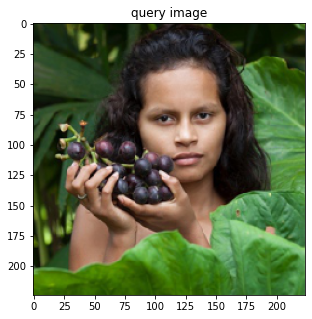

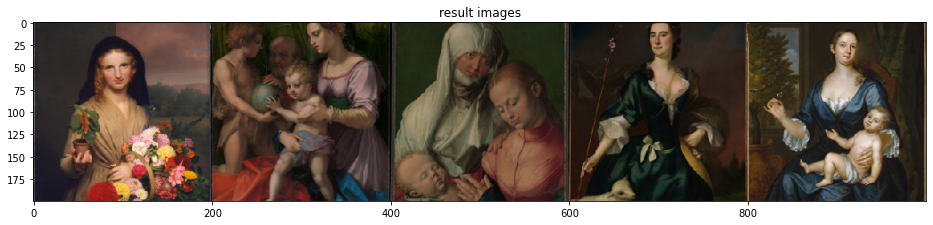

In [17]:
# load image and extract features
new_image, x = load_image(r"D:\ML\ColombiArtistas\Ztodos\Cropped\f00016_Agustinalallana_017.jpg")
new_features = feat_extractor.predict(x)

# project it into pca space
new_pca_features = pca.transform(new_features)[0]

# calculate its distance to all the other images pca feature vectors
distances = [ distance.cosine(new_pca_features, feat) for feat in pca_features ]
idx_closest = sorted(range(len(distances)), key=lambda k: distances[k])[0:5]  # grab first 5
idx_closest1 = sorted(range(len(distances)), key=lambda k: distances[k])[0] #grab the closest
results_image = get_concatenated_images(idx_closest, 200)

# display the results
plt.figure(figsize = (5,5))
plt.imshow(new_image)
plt.title("query image")

# display the resulting images
plt.figure(figsize = (16,12))
plt.imshow(results_image)
plt.title("result images")

In [45]:
new_features.shape

(1, 4096)

## Visualize Similarity

In [18]:
distances[:5]

[0.9588137269020081,
 1.0896402969956398,
 0.9470937922596931,
 1.0868463069200516,
 0.8442916870117188]

In [19]:
# Get average of a list 
def average(lst): 
	return sum(lst) / len(lst) 

In [20]:
average(distances)

0.9906445348141957

In [21]:
idx_closest1

820

In [22]:
distances[idx_closest1]

0.4627413749694824

## Getting the features for all images of new artists

Running the same pretrained model and obtaining the same features ensures that the comparison of features between MetMuseum Collection and Contemporary Artists is compatible

In [23]:
import time
tic = time.perf_counter()

In [31]:
# load image and extract features
images_path = rimages_path = r"D:\ML\ColombiArtistas\Ztodos\Cropped"
image_extensions = ['.jpg', '.png', '.jpeg']
featuresart = []
max_num_images = 10000

imagez = [os.path.join(dp, f) for dp, dn, filenames in os.walk(images_path) for f in filenames if os.path.splitext(f)[1].lower() in image_extensions]
if max_num_images < len(imagez):
    imagez = [imagez[i] for i in sorted(random.sample(xrange(len(imagez)), max_num_images))]
    
for i, image_path in enumerate(imagez):
    if i % 500 == 0:
        toc = time.perf_counter()
        elap = toc-tic;
        print("analyzing image %d / %d. Time: %4.4f seconds." % (i, len(imagez),elap))
        tic = time.perf_counter()
    img, x = load_image(image_path);
    featr = feat_extractor.predict(x)
    featuresart.append(featr)

analyzing image 0 / 8760. Time: 340.9568 seconds.
analyzing image 500 / 8760. Time: 115.2717 seconds.
analyzing image 1000 / 8760. Time: 115.3635 seconds.
analyzing image 1500 / 8760. Time: 116.0664 seconds.
analyzing image 2000 / 8760. Time: 113.9061 seconds.
analyzing image 2500 / 8760. Time: 113.9162 seconds.
analyzing image 3000 / 8760. Time: 117.2968 seconds.
analyzing image 3500 / 8760. Time: 119.8547 seconds.
analyzing image 4000 / 8760. Time: 119.8315 seconds.
analyzing image 4500 / 8760. Time: 119.8254 seconds.
analyzing image 5000 / 8760. Time: 118.9898 seconds.
analyzing image 5500 / 8760. Time: 113.1218 seconds.
analyzing image 6000 / 8760. Time: 112.9670 seconds.
analyzing image 6500 / 8760. Time: 111.7249 seconds.
analyzing image 7000 / 8760. Time: 112.4302 seconds.
analyzing image 7500 / 8760. Time: 111.4545 seconds.
analyzing image 8000 / 8760. Time: 112.3471 seconds.
analyzing image 8500 / 8760. Time: 116.6200 seconds.


Save the features of the new artists to a pickle file in case you need to reuse the info later

In [42]:
import pickle

pickle.dump([imagez, featuresart], open(r"D:\ML\ColombiArtistas\ColombiArtistasFeat.p", 'wb'))

*Run from here in case features were already extracted*

In [27]:
imagez, featuresart = pickle.load(open(r"D:\ML\ColombiArtistas\ColombiArtistasFeat.p", 'rb'))

for img, f in list(zip(imagez, newartist_pca_features))[0:5]:
    print("image: %s, features: %0.2f,%0.2f,%0.2f,%0.2f... "%(img, f[0], f[1], f[2], f[3]))

image: D:\ML\ColombiArtistas\Ztodos\Cropped\f00000_Agustinalallana_001.jpg, features: -10.57,-3.62,-19.28,-1.13... 


Path selection of name and Object ID

In [29]:
imagez[456][37:-4]

'f00456_Alequint_286'

In [33]:
len(featuresart[324][0])

4096

## Making a DF with the average distance to General Collection, the Closest Work in the Collection and the Top 10 works

The decision to include these 3 parameters is that there are some works that are really simmilar to their closest one in the collection, and the values in this category vary widely (approx 0.4 points). The distance to general collection is a different issue, since it takes so many works into account, the variation between the top and the bottom value is very small (0.03 points or 10 times less than the first category). That is why I included a third category with K = 10 (or the distance to the 10 closest artworks) to give another parameter to judge that is not as narrow as the general collection (the variation for this value is 0.06)

In [34]:
import statistics as st

In [35]:
# Get average of a list 
def average(lst): 
	return sum(lst) / len(lst) 

def getrange(numbers):
    return max(numbers) - min(numbers)
getrange(distances)

0.921250581741333

In [41]:
closim = []
closindx = []
avgcol = []
auxlist = []
avg10 = []
medianl = []
stdl = []
rang = []
med10 = []

for s in featuresart:
    # project it into pca space
    newartist_pca_features = pca.transform(s)
    # calculate its distance to all the other images pca feature vectors
    distances = [ distance.cosine(newartist_pca_features, feat) for feat in pca_features ]
    idx_closest1 = sorted(range(len(distances)), key=lambda k: distances[k])[0] #grabs the closest
    idx_closest10 = sorted(range(len(distances)), key=lambda k: distances[k])[0:10]#grabs the top 10
    idx_closest = sorted(range(len(distances)), key=lambda k: distances[k])[0:5] # grabs the top 5
    medianl.append(st.median(distances)) #gets the median distances to collection
    avgcol.append(average(distances)) #gets the average distances to collection
    stdl.append(np.std(distances)) #gets the standard deviation for distances to collection
    rang.append(getrange(distances)) #gets the range (distance from lowest to highest values) of values to collection
    closindx.append(idx_closest) #gets the indexes of the closest 5 images
    closim.append(distances[idx_closest1]) #gets the distance to closest image
    for idx in idx_closest10:
        auxlist.append(distances[idx])
    avg10.append(average(auxlist)) #gets the average distance to top 10
    med10.append(st.median(auxlist)) #gets the median of the distances to top 10
    

In [43]:
import pandas as pd
import numpy as np


In [44]:
min(distances)

0.518613874912262

In [45]:
average(distances)

0.9933822014203357

In [46]:
st.median(distances)

0.9892791537567973

In [47]:
np.std(distances)

0.162991457397307

In [48]:
#Getting the name of the work from the filename so I can use it in the Dataframe Index
indexnames = []
for name in imagez:
    indexnames.append(name[37:-4])

In [49]:
Meth_proyectD = {'Distance to closest Image':closim,'Average Distance to collection':avgcol,'Median of distances':medianl,
                 'Standard Deviation':stdl, 'Range of values': rang, 'Indexes of Closest Images':closindx, 
                 'Avg Distances top 10':avg10, 'Median distances top 10': med10}

In [50]:
df = pd.DataFrame(Meth_proyectD, index=indexnames) 

In [51]:
df

Distance to closest Image  \
f00000_Agustinalallana_001                   0.562036   
f00001_Agustinalallana_002                   0.537348   
f00002_Agustinalallana_003                   0.516487   
f00003_Agustinalallana_004                   0.444212   
f00004_Agustinalallana_005                   0.326989   
...                                               ...   
f08373_vivianabtroya_140                     0.499893   
f08374_vivianabtroya_141                     0.518614   
f08375_vivianabtroya_142                     0.474470   
f08376_vivianabtroya_143                     0.461795   
f08378_vivianabtroya_141                     0.518614   

                            Average Distance to collection  \
f00000_Agustinalallana_001                        0.993585   
f00001_Agustinalallana_002                        0.981237   
f00002_Agustinalallana_003                        0.990059   
f00003_Agustinalallana_004                        0.982522   
f00004_Agustinalallana_005                        0.982438   
...                                                    ...   
f08373_vivianabtroya_140                          0.999914   
f08374_vivianabtroya_141                          0.993382   
f08375_vivianabtroya_142                          0.994242   
f08376_vivianabtroya_143                          0.991553   
f08378_vivianabtroya_141                          0.993382   

                            Median of distances  Standard Deviation  \
f00000_Agustinalallana_001             0.998627            0.141621   
f00001_Agustinalallana_002             0.987531            0.178997   
f00002_Agustinalallana_003             0.990925            0.171697   
f00003_Agustinalallana_004             0.997794            0.174456   
f00004_Agustinalallana_005             0.992489            0.188275   
...                                         ...                 ...   
f08373_vivianabtroya_140               1.010194            0.132064   
f08374_vivianabtroya_141               0.989279            0.162991   
f08375_vivianabtroya_142               1.001613            0.175356   
f08376_vivianabtroya_143               0.990007            0.176397   
f08378_vivianabtroya_141               0.989279            0.162991   

                            Range of values  Indexes of Closest Images  \
f00000_Agustinalallana_001         0.874304    [737, 25, 77, 406, 888]   
f00001_Agustinalallana_002         0.883254      [211, 4, 605, 806, 2]   
f00002_Agustinalallana_003         0.915082   [792, 522, 787, 73, 751]   
f00003_Agustinalallana_004         0.941230  [806, 114, 889, 857, 211]   
f00004_Agustinalallana_005         1.140021    [252, 522, 496, 43, 97]   
...                                     ...                        ...   
f08373_vivianabtroya_140           0.840954  [556, 327, 184, 910, 459]   
f08374_vivianabtroya_141           0.874288  [110, 327, 459, 184, 962]   
f08375_vivianabtroya_142           0.949957  [327, 554, 556, 110, 540]   
f08376_vivianabtroya_143           0.989622  [459, 110, 562, 796, 234]   
f08378_vivianabtroya_141           0.874288  [110, 327, 459, 184, 962]   

                            Avg Distances top 10  Median distances top 10  
f00000_Agustinalallana_001              0.632063                 0.638468  
f00001_Agustinalallana_002              0.596511                 0.573388  
f00002_Agustinalallana_003              0.581959                 0.566943  
f00003_Agustinalallana_004              0.564219                 0.558164  
f00004_Agustinalallana_005              0.532096                 0.543857  
...                                          ...                      ...  
f08373_vivianabtroya_140                0.505205                 0.522239  
f08374_vivianabtroya_141                0.505215                 0.522251  
f08375_vivianabtroya_142                0.505219                 0.522254  
f08376_vivianabtroya_143                0.505224                 0.522258  
f08378_vivianabtroya

#### Top 10 of Images with a closest neighbor in the Met Collection

In [52]:
#df.sort_values(by=['Distance to closest Image']).head(10)
df[['Distance to closest Image','Indexes of Closest Images']].sort_values(by=['Distance to closest Image']).head(10)

Distance to closest Image  \
f08086_vicentavictoriagomez_013                   0.076375   
f08090_vicentavictoriagomez_013                   0.076375   
f03375_danielalopezp_476                          0.078277   
f00147_Agustinalallana_148                        0.082627   
f04045_feliperomero30_225                         0.087045   
f04824_guarnizo_david_094                         0.087700   
f02959_danielalopezp_060                          0.090014   
f04792_guarnizo_david_062                         0.090103   
f03161_danielalopezp_262                          0.090912   
f02949_danielalopezp_050                          0.091088   

                                 Indexes of Closest Images  
f08086_vicentavictoriagomez_013   [839, 68, 878, 441, 890]  
f08090_vicentavictoriagomez_013   [839, 68, 878, 441, 890]  
f03375_danielalopezp_476          [522, 964, 381, 918, 73]  
f00147_Agustinalallana_148       [381, 522, 964, 444, 883]  
f04045_feliperomero30_225        [344, 345, 217, 878, 441]  
f04824_guarnizo_david_094         [522, 883, 43, 964, 444]  
f02959_danielalopezp_060          [522, 883, 444, 964, 73]  
f04792_guarnizo_david_062         [522, 883, 964, 73, 444]  
f03161_danielalopezp_262         [381, 883, 522, 934, 444]  
f02949_danielalopezp_050          [522, 381, 964, 444, 73]

In [53]:
getrange(df['Distance to closest Image'])

0.5955196619033813

#### Top 10 of Images closest to the center of the Met Collection

In [54]:
df[['Median of distances','Indexes of Closest Images']].sort_values(by=['Median of distances']).head(20)

Median of distances  \
f05258_jpuribem_142                             0.966820   
f03313_danielalopezp_414                        0.968739   
f06126_klauslundi_112                           0.969363   
f06347_layosandres_157                          0.970103   
f06362_layosandres_172                          0.970916   
f01864_camilabarretohoyos__113                  0.972168   
f03253_danielalopezp_354                        0.972259   
f00569_Alequint_399                             0.972341   
f07584_sebastian_fonnegra_221                   0.973014   
f01861_camilabarretohoyos__110                  0.973586   
f05077_haymuchasanas_145                        0.973986   
f05718_juancortes79_077                         0.974010   
f06418_layosandres_228                          0.974496   
f01854_camilabarretohoyos__103                  0.974602   
f05499_juan_covelli_234                         0.974622   
f06744_layosandres_554                          0.974812   
f02098_carolina_diaz_g__016                     0.975191   
f06955_namejiam_015                             0.975199   
f00779_Alequint_609                             0.975266   
f06810_mauriciojaramilloartista_063             0.975281   

                                     Indexes of Closest Images  
f05258_jpuribem_142                  [537, 959, 446, 696, 809]  
f03313_danielalopezp_414             [792, 751, 201, 252, 918]  
f06126_klauslundi_112                [806, 710, 889, 472, 164]  
f06347_layosandres_157               [295, 894, 757, 153, 954]  
f06362_layosandres_172                [378, 33, 285, 344, 459]  
f01864_camilabarretohoyos__113       [313, 632, 888, 210, 871]  
f03253_danielalopezp_354             [592, 250, 608, 252, 967]  
f00569_Alequint_399                  [888, 925, 766, 495, 538]  
f07584_sebastian_fonnegra_221        [761, 829, 153, 855, 447]  
f01861_camilabarretohoyos__110       [212, 737, 855, 313, 213]  
f05077_haymuchasanas_145             [344, 888, 188, 212, 213]  
f05718_juancortes79_077                [463, 38, 234, 459, 52]  
f06418_layosandres_228               [184, 965, 943, 834, 713]  
f01854_camilabarretohoyos__103        [313, 888, 892, 439, 68]  
f05499_juan_covelli_234              [887, 344, 126, 250, 270]  
f06744_layosandres_554               [685, 609, 205, 150, 179]  
f02098_carolina_diaz_g__016          [857, 747, 738, 710, 737]  
f06955_namejiam_015                     [4, 632, 348, 42, 446]  
f00779_Alequint_609                  [807, 265, 603, 319, 592]  
f06810_mauriciojaramilloartista_063   [42, 748, 335, 542, 881]

In [55]:
df[['Median of distances','Average Distance to collection','Standard Deviation']].sort_values(by=['Median of distances'])#.head(20)

Median of distances  \
f05258_jpuribem_142                            0.966820   
f03313_danielalopezp_414                       0.968739   
f06126_klauslundi_112                          0.969363   
f06347_layosandres_157                         0.970103   
f06362_layosandres_172                         0.970916   
...                                                 ...   
f04534_gabrielhernandezserrato_290             1.059402   
f04644_gabrielhernandezserrato_400             1.060595   
f04574_gabrielhernandezserrato_330             1.064284   
f04536_gabrielhernandezserrato_292             1.067003   
f04531_gabrielhernandezserrato_287             1.072260   

                                    Average Distance to collection  \
f05258_jpuribem_142                                       0.980635   
f03313_danielalopezp_414                                  0.989988   
f06126_klauslundi_112                                     0.983819   
f06347_layosandres_157                                    0.987524   
f06362_layosandres_172                                    0.991525   
...                                                            ...   
f04534_gabrielhernandezserrato_290                        1.016446   
f04644_gabrielhernandezserrato_400                        1.014036   
f04574_gabrielhernandezserrato_330                        1.016686   
f04536_gabrielhernandezserrato_292                        1.010149   
f04531_gabrielhernandezserrato_287                        1.009819   

                                    Standard Deviation  
f05258_jpuribem_142                           0.173977  
f03313_danielalopezp_414                      0.185535  
f06126_klauslundi_112                         0.168553  
f06347_layosandres_157                        0.188885  
f06362_layosandres_172                        0.188172  
...                                                ...  
f04534_gabrielhernandezserrato_290            0.213242  
f04644_gabrielhernandezserrato_400            0.222403  
f04574_gabrielhernandezserrato_330            0.197525  
f04536_gabrielhernandezserrato_292            0.224647  
f04531_gabrielhernandezserrato_287            0.231748  

[8760 rows x 3 columns]

#### Top 10 of Images closest to their closest 10 works from the Met Collection 

In [56]:
df[['Median distances top 10','Indexes of Closest Images']].sort_values(by=['Median distances top 10'])#.head(10)

Median distances top 10  Indexes of Closest Images
f00370_Alequint_200                        0.498036   [765, 607, 319, 33, 807]
f00372_Alequint_202                        0.498113  [232, 111, 504, 955, 471]
f00369_Alequint_199                        0.498188  [319, 164, 807, 472, 603]
f00400_Alequint_230                        0.498188   [918, 73, 792, 267, 794]
f00371_Alequint_201                        0.498222  [257, 495, 270, 117, 608]
...                                             ...                        ...
f00013_Agustinalallana_014                 0.551015   [103, 576, 406, 159, 90]
f00003_Agustinalallana_004                 0.558164  [806, 114, 889, 857, 211]
f00002_Agustinalallana_003                 0.566943   [792, 522, 787, 73, 751]
f00001_Agustinalallana_002                 0.573388      [211, 4, 605, 806, 2]
f00000_Agustinalallana_001                 0.638468    [737, 25, 77, 406, 888]

[8760 rows x 2 columns]

## Creating a ranking

It ranks the works for each of the three parameters mentioned above. Then it sums the position it has. The works with the lowest position (those which are closest to all three parameters) go to the top

In [57]:
#df['Score ClosestImg'] = df['Distance to closest Image'].rank(ascending = 1)
df['Score AvgtoCollection'] = df['Average Distance to collection'].rank(ascending = 1)
df['Score AvgTop10'] = df['Avg Distances top 10'].rank(ascending = 1)
df['Score ClosestImg'] = df['Distance to closest Image'].rank(ascending = 1)
df['Score Median Collection'] = df['Median of distances'].rank(ascending = 1)
df['Score Median Top10'] = df['Median distances top 10'].rank(ascending = 1)
df['Total Score'] = (df['Score AvgTop10'] + df['Score AvgtoCollection'] +  df['Score ClosestImg'] + df['Score Median Top10'] + df['Score Median Collection']) / 5

In [58]:
#df.drop(['Score Top10'], axis=1, inplace=True)
images[232]

'D:\\ML\\MetImages\\Cropped288\\f00232_Dish in the Shape of a Leaf42183.jpg'

In [59]:
df.sort_values(by=['Total Score']).head(50)

Distance to closest Image  \
f04894_guarnizo_david_164                        0.263094   
f00389_Alequint_219                              0.359355   
f00228_Alequint_058                              0.274918   
f05006_haymuchasanas_074                         0.270528   
f00434_Alequint_264                              0.349370   
f00345_Alequint_175                              0.356706   
f00319_Alequint_149                              0.386161   
f05081_haymuchasanas_149                         0.266355   
f00371_Alequint_201                              0.376975   
f04130_felipeuribemejia_059                      0.292795   
f05250_jpuribem_134                              0.259279   
f00052_Agustinalallana_053                       0.350382   
f00558_Alequint_388                              0.369765   
f04969_haymuchasanas_037                         0.324594   
f05125_jpuribem_009                              0.208639   
f00394_Alequint_224                              0.305251   
f00264_Alequint_094                              0.341317   
f05066_haymuchasanas_134                         0.313535   
f00489_Alequint_319                              0.356414   
f00376_Alequint_206                              0.417008   
f04963_haymuchasanas_031                         0.236361   
f00028_Agustinalallana_029                       0.354286   
f00262_Alequint_092                              0.371095   
f05215_jpuribem_099                              0.259767   
f05065_haymuchasanas_133                         0.309490   
f00064_Agustinalallana_065                       0.313587   
f00578_Alequint_408                              0.187854   
f04068_feliperomero30_248                        0.265401   
f01113_Alexandra_Mccormick_036                   0.275436   
f05202_jpuribem_086                              0.222994   
f04863_guarnizo_david_133                        0.148708   
f00520_Alequint_350                              0.374434   
f00351_Alequint_181                              0.314489   
f00411_Alequint_241                              0.410107   
f05172_jpuribem_056                              0.241790   
f05033_haymuchasanas_101                         0.218569   
f00425_Alequint_255                              0.412001   
f00780_Alequint_610                              0.255247   
f05122_jpuribem_006                              0.230358   
f04933_haymuchasanas_001                         0.314030   
f05247_jpuribem_131                              0.331266   
f00586_Alequint_416                              0.386982   
f00432_Alequint_262                              0.362408   
f05155_jpuribem_039                              0.261175   
f05097_haymuchasanas_165                         0.304701   
f00047_Agustinalallana_048                       0.300148   
f00498_Alequint_328                              0.342939   
f00506_Alequint_336                              0.326761   
f05045_haymuchasanas_113                         0.241754   
f00031_Agustinalallana_032                       0.353376   

                                Average Distance to collection  \
f04894_guarnizo_david_164                             0.980004   
f00389_Alequint_219                                   0.980424   
f00228_Alequint_058                                   0.981408   
f05006_haymuchasanas_074                              0.980609   
f00434_Alequint_264                                   0.982377   
f00345_Alequint_175                                   0.980961   
f00319_Alequint_149                                   0.982051   
f05081_haymuchasanas_149                              0.978276   
f00371_Alequint_201                                   0.982618   
f04130_felipeuribemejia_059                           0.979714   
f05250_jpuribem_134                                   0.978866   
f00052_Agustinalallana_053                            0.979855   
f00558_Alequint_388                                   0.980796

In [60]:
df.loc['f00047_Agustinalallana_048']

Distance to closest Image                          0.300148
Average Distance to collection                     0.980184
Median of distances                                 1.00067
Standard Deviation                                 0.181911
Range of values                                     1.13753
Indexes of Closest Images         [608, 469, 418, 592, 593]
Avg Distances top 10                               0.481736
Median distances top 10                             0.51255
Score AvgtoCollection                                   288
Score AvgTop10                                           19
Score ClosestImg                                       1020
Score Median Collection                                3895
Score Median Top10                                      726
Total Score                                          1189.6
Name: f00047_Agustinalallana_048, dtype: object

In [95]:
images[469]

'D:\\ML\\MetImages\\Cropped288\\f00469_Lucas van Uffel  died 1637 436253.jpg'

*Conclusions:* After seeing the final top 20, and the type of work it choose, I'm very satisfied to say that it works as expected. The works making it into the top 20 are by just 10 different artists, all of them featuring works on paper, from traditional chinese painting or calligraphy, or oil painting portraits, or strong blue color. All of the works selected show a more traditional style in terms of composition and media, pretty much in line with the overall tendency within the MetMuseum collection. It would be worrying if it placed atop more abstract or contemporary works, since the Metropolitan Museum collection is mostly classical in style. The highlight works from the 'documents and books' department might deviate the selection towards works on paper and from a particular tonality (predominantly brown-white-blue), but still show consistency with the general aspect of those hightlight pieces.

Save the final ranking to a .csv file to compare in the Final Ranking Notebook.

In [61]:
df.to_csv('ColombiArtist_Image_Ranking.csv', sep='\t', encoding='utf-8')